# Basics Probability 

This code demonstrates probability basics by using multiple examples, techniqes and real world senarios. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as sts
%matplotlib inline

# Assignment

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook above, reproduce the pop1 and pop2 populations and samples using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

Expectations: Because the pValues are closer, its posible that the central tendency values would also be closer everytime the data is run. 

In [4]:
rand1 = np.random.binomial(10, 0.2, 10000)
rand2 = np.random.binomial(10, 0.5, 10000)
rand1,rand2

(array([2, 4, 2, ..., 2, 2, 3]), array([6, 3, 6, ..., 3, 5, 7]))

In [48]:
samp1 = pd.DataFrame(rand1).sample(1000)
samp2 = pd.DataFrame(rand2).sample(1000)
print("The mean of sample 100 taken from rand1 is: ", samp1.mean());
print("The mean of sample 100 taken from rand2 is: ", samp2.mean());

The mean of sample 100 taken from rand1 is:  0    2.025
dtype: float64
The mean of sample 100 taken from rand2 is:  0    5.068
dtype: float64


In [49]:
print("The standard deviasion of sample 100 taken from rand1 is: ", samp1.std());
print("The standard deviasion of sample 100 taken from rand2 is: ", samp2.std());

The standard deviasion of sample 100 taken from rand1 is:  0    1.260144
dtype: float64
The standard deviasion of sample 100 taken from rand2 is:  0    1.598728
dtype: float64


Q1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

In [50]:
samp3 = np.random.choice(rand1, 1000, replace =True)
samp4 = np.random.choice(rand2, 1000, replace =True)

In [51]:
print("The mean & standard deviation of 1000 samples taken from rand1 is: ", samp3.mean(), samp3.std())
print("The mean & standard deviasion of 1000 samples taken from rand2 is: ", samp4.mean(), samp4.std())

The mean & standard deviation of 1000 samples taken from rand1 is:  2.065 1.2652173726281188
The mean & standard deviasion of 1000 samples taken from rand2 is:  4.944 1.5410593758840054


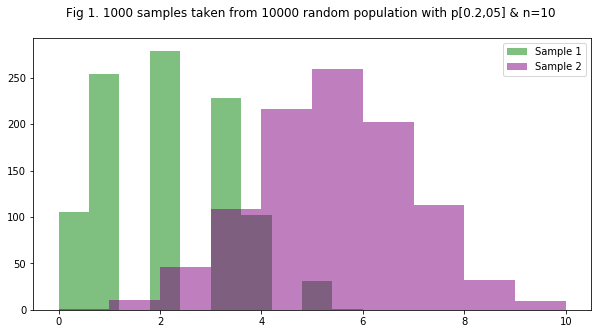

In [56]:
plt.figure(figsize=(10, 5))
plt.hist(samp3, color='green', alpha=0.5, label='Sample 1')
plt.hist(samp4, color='purple', alpha=0.5, label='Sample 2')
plt.title('Fig 1. 1000 samples taken from 10000 random population with p[0.2,05] & n=10 \n')
plt.legend(loc='upper right')
plt.show()

In [20]:
#Now lets, try taking a sample 20 and compute the central tendency values
samp5 = np.random.choice(rand1, 20, replace=True)
samp6 = np.random.choice(rand2, 20, replace=True)

(array([2, 1, 2, 4, 3, 5, 0, 4, 0, 2, 4, 0, 0, 1, 0, 0, 1, 0, 1, 2]),
 array([2, 6, 3, 5, 6, 6, 3, 5, 2, 3, 2, 5, 6, 6, 4, 6, 4, 7, 6, 5]))

In [21]:
print("The mean & standard deviation of 20 samples taken from rand1 is: ", samp3.mean(), samp3.std())
print("The mean & standard deviasion of 20 samples taken from rand2 is: ", samp4.mean(), samp4.std())

The mean & standard deviation of 20 samples taken from rand1 is:  2.053 1.2728672358105537
The mean & standard deviasion of 20 samples taken from rand2 is:  5.079 1.5870598602447232


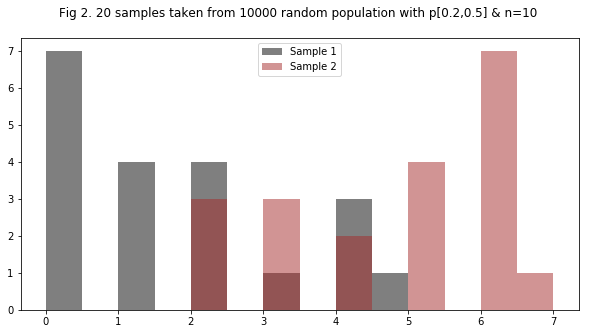

In [59]:
plt.figure(figsize=(10, 5))
plt.hist(samp5, color='black', alpha=0.5, label='Sample 1')
plt.hist(samp6, color='brown', alpha=0.5, label='Sample 2')
plt.title('Fig 2. 20 samples taken from 10000 random population with p[0.2,0.5] & n=10 \n')
plt.legend(loc='upper center')
plt.show()

Q2. Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

In [32]:
#p-value is 0.3 for rand1 instead of 0.2
rand3 = np.random.binomial(10, 0.3, 10000)
samp31 = np.random.choice(rand3, 100, replace=True)
rand4 = np.random.binomial(10, 0.4, 10000)
samp41 = np.random.choice(rand4, 100, replace=True)

In [33]:
#Now we have the all the samples and random set of numbers, lets calculate the t-test and p-values
from scipy.stats import ttest_ind
print(ttest_ind(samp31, samp2, equal_var=False))

Ttest_indResult(statistic=array([-9.72527471]), pvalue=array([1.76108681e-18]))


In [35]:
print(ttest_ind(samp31, samp41, equal_var=False))

Ttest_indResult(statistic=-4.502410018287283, pvalue=1.1517392035595374e-05)


As we change the p-values, the statistics test or t-values have changed greately towards dicreasing value. The greater the p-value, the smaller the t-test is and bringing the statistics and pvlues closer.

Q3. Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

In [39]:
rand5 = np.random.normal(10, 0.3, 10000)
rand6 = np.random.normal(10, 0.5, 10000)
print("Mean5 :",rand5.mean(), "STD5 :",rand5.std())
print("Mean6 :",rand6.mean(), "STD6 :",rand6.std())

Mean5 : 9.995043634096975 STD5 : 0.2972793163850114
Mean6 : 10.00242206239056 STD6 : 0.5005475416568768


In [40]:
#Taking 20 sample from the total population
samp51 = np.random.choice(rand5, 20, replace=True)
samp61 = np.random.choice(rand6, 20, replace=True)

(array([ 9.98942956, 10.28401748, 10.26825072,  9.92004138, 10.56253846,
        10.17689144, 10.42408415, 10.14934899,  9.77530712, 10.47382183,
        10.02451035,  9.46487586, 10.14027697,  9.95509016,  9.25852418,
        10.0073353 ,  9.97338817,  9.90765336,  9.70857829,  9.83112363]),
 array([ 8.70729493,  9.22092776, 10.58403925, 10.06331219, 10.69324348,
        10.6032583 ,  9.5396868 , 10.41532702, 10.80888918,  8.50114142,
         9.57058253, 10.28317103,  9.72699524,  9.8760557 , 10.59368393,
         9.6120324 ,  9.88984725,  9.69563175, 10.86805443, 10.37737934]))

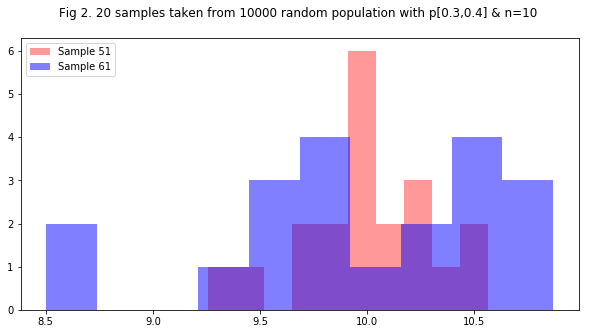

In [62]:
#Lets plot the new samples with histogram
plt.figure(figsize=(10, 5))
plt.hist(samp51, color='red', alpha=0.4, label='Sample 51')
plt.hist(samp61, color='blue', alpha=0.5, label='Sample 61')
plt.title('Fig 2. 20 samples taken from 10000 random population with p[0.3,0.4] & n=10 \n')
plt.legend(loc='upper left')
plt.show()

In [63]:
#Finally, lets calculate the ttest and p-values 
print(ttest_ind(samp51, samp61, equal_var=False))

Ttest_indResult(statistic=0.19926996938556799, pvalue=0.8435319791219138)
